In [ ]:
import cv2


image = cv2.imread("/Users/uv/Desktop/computerVISION/abc.jpg")


compression_quality = 50  


cv2.imwrite("compressed_image.jpg", image, [cv2.IMWRITE_JPEG_QUALITY, compression_quality])


compressed_jpeg = cv2.imread("compressed_image.jpg")

cv2.imshow("Original Image", image)
cv2.imshow("Compressed JPEG", compressed_jpeg)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("Lossy compression (JPEG) applied and displayed successfully!")


In [ ]:
import cv2


image = cv2.imread("/Users/uv/Desktop/computerVISION/downloa.png")


compression_level = 9  


cv2.imwrite("compressed_image.png", image, [cv2.IMWRITE_PNG_COMPRESSION, compression_level])

compressed_png = cv2.imread("compressed_image.png")

cv2.imshow("Original Image", image)
cv2.imshow("Compressed PNG", compressed_png)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("Lossless compression (PNG) applied and displayed successfully!")


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images (scale pixels between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images to match CNN input shape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (One-Hot Encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Split into 80-20
split = int(0.8 * len(x_train))
x_train, x_val = x_train[:split], x_train[split:]
y_train, y_val = y_train[:split], y_train[split:]


In [2]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64)


Epoch 1/10


/Users/uv/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8784 - loss: 0.4207 - val_accuracy: 0.9787 - val_loss: 0.0726
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9829 - loss: 0.0543 - val_accuracy: 0.9862 - val_loss: 0.0462
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9887 - loss: 0.0361 - val_accuracy: 0.9884 - val_loss: 0.0429
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9927 - loss: 0.0245 - val_accuracy: 0.9888 - val_loss: 0.0421
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9898 - val_loss: 0.0367
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9957 - loss: 0.0132 - val_accuracy: 0.9886 - val_loss: 0.0408
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 0.9879 - val_loss: 0.0464
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9965 - loss: 0.0096 - val_accuracy: 0.98

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9903
Precision: 0.9904
Recall: 0.9901
F1-Score: 0.9902


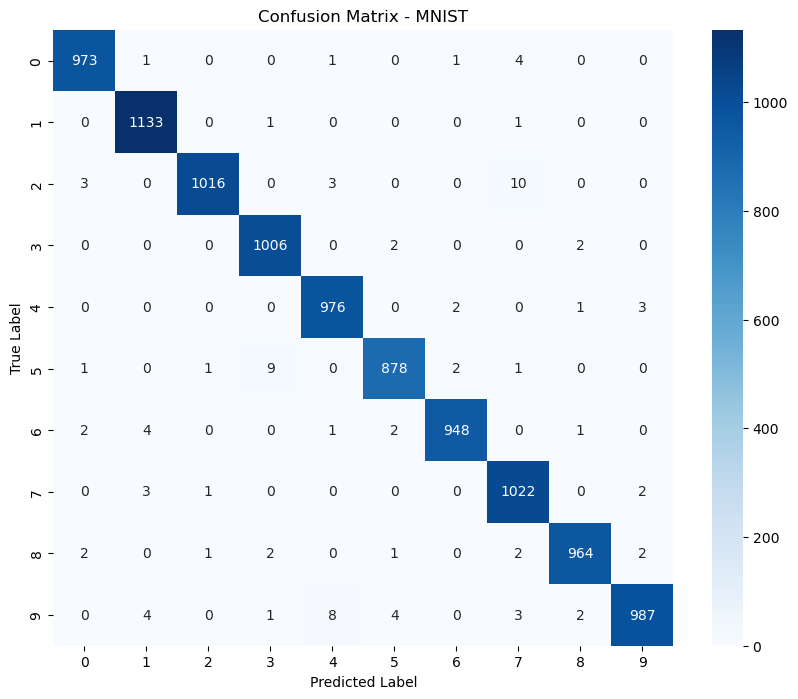

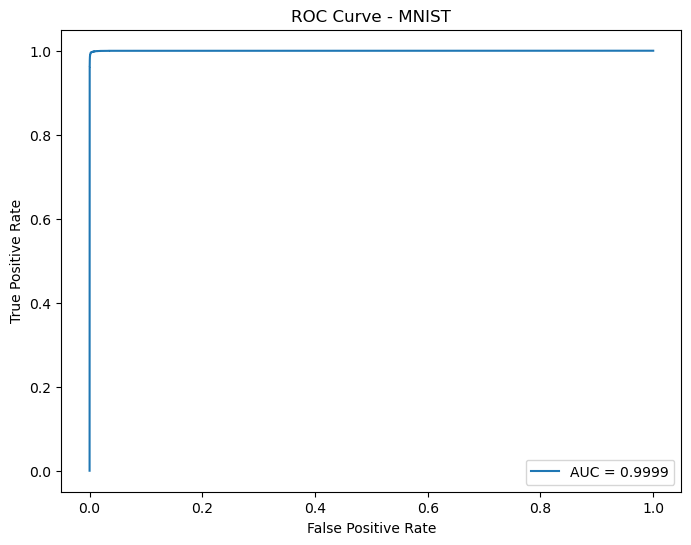

In [3]:
# Predict on test data
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute Classification Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = np.mean(y_pred == y_true)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MNIST")
plt.show()

# Compute ROC and AUC
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MNIST")
plt.legend()
plt.show()


In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images (scale pixels between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Split into 80-20
split = int(0.8 * len(x_train))
x_train, x_val = x_train[:split], x_train[split:]
y_train, y_val = y_train[:split], y_train[split:]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 111s 1us/step


In [5]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64)


/Users/uv/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.3135 - loss: 1.8426 - val_accuracy: 0.4773 - val_loss: 1.4595
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5442 - loss: 1.2789 - val_accuracy: 0.5677 - val_loss: 1.2063
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6178 - loss: 1.0886 - val_accuracy: 0.6081 - val_loss: 1.1258
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6650 - loss: 0.9595 - val_accuracy: 0.6598 - val_loss: 1.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6944 - loss: 0.8785 - val_accuracy: 0.6683 - val_loss: 0.9629
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7209 - loss: 0.8081 - val_accuracy: 0.6958 - val_loss: 0.8835
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7473 - loss: 0.7277 - val_accuracy: 0.6813 - val_loss: 0.9361
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7666 - loss: 0.6763 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.6970
Precision: 0.7073
Recall: 0.6970
F1-Score: 0.6969


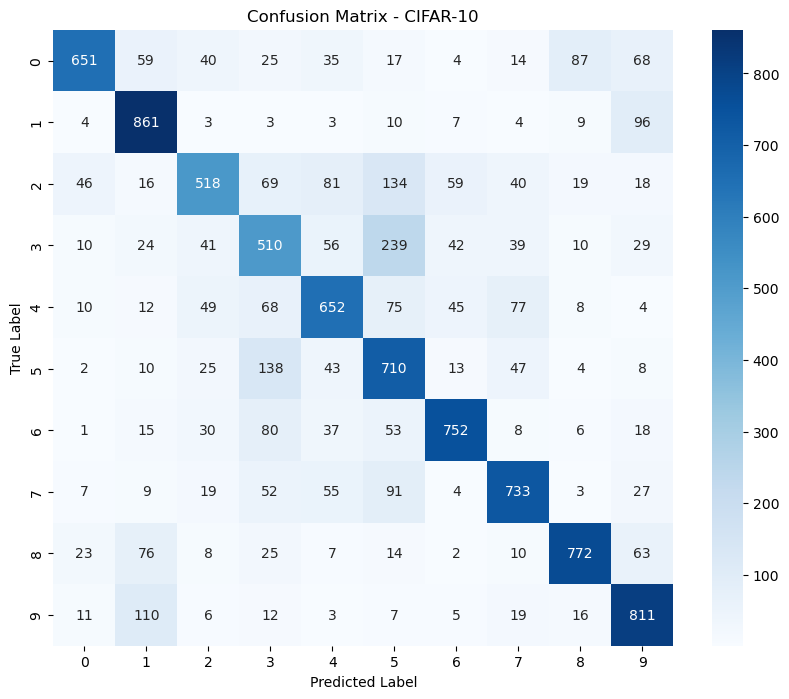

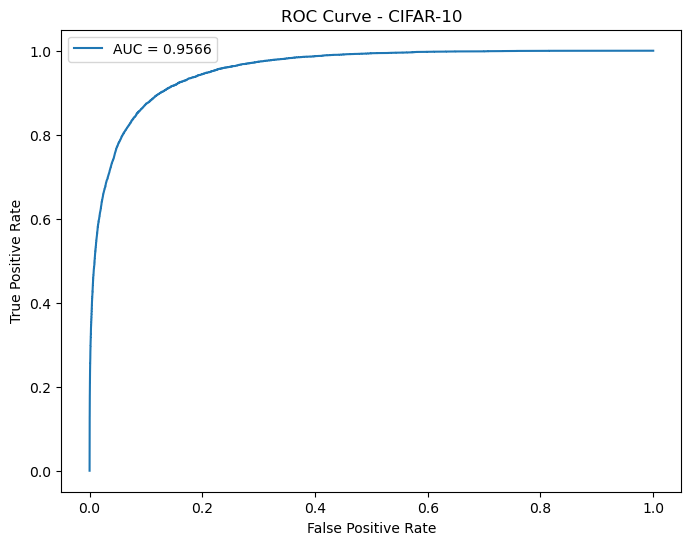

In [6]:
# Predict on test data
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute Classification Metrics
accuracy = np.mean(y_pred == y_true)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CIFAR-10")
plt.show()

# Compute ROC and AUC
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CIFAR-10")
plt.legend()
plt.show()
